# Question 1
The dataset *ps2q1.dta* contains data on 177 chief executive officers and can be used to examine the effects of firm performance on CEO salary. 


* Estimate a model relating the CEO's annual salary, the dependent variable, to firm sales, the independent variable.  

$$salary_i= \alpha_0 + \alpha_1sales_i + u_i$$

What is your estimate of the intercept and the slope? Don't forget the units, which you can find using the "describe" command.  Interpret these estimates, providing an intuitive description that a person who has not taken econometrics can understand.  Does your result make economic sense?

In [9]:
# Import packages here 
#import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
ps2q1 = pd.read_stata("/Users/gavinmason/Downloads/ps2q1.dta")

model1 = smf.ols(formula = "salary ~ sales", data=ps2q1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     136.6
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.08e-23
Time:                        13:25:18   Log-Likelihood:                -1456.2
No. Observations:                 177   AIC:                             2916.
Df Residuals:                     175   BIC:                             2923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    474.2893     79.154      5.992      0.000     318.071     630.508
sales          0.1317      0.011     11.687      0.000       0.109       0.154
==============================================================================
Omnibus:                      187.510   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8601.497
Skew:                           3.774   Prob(JB):                         0.00
Kurtosis:                      36.307   Cond. No.                     8.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model1.params

Intercept    474.289322
sales          0.131721
dtype: float64

In [18]:
round(ps2q1[["salary", "sales"]].describe().loc[["count","mean","std"]],3)

,salary,sales
count,177.000,177.000
mean,939.192,3529.463
std,1211.342,6088.654


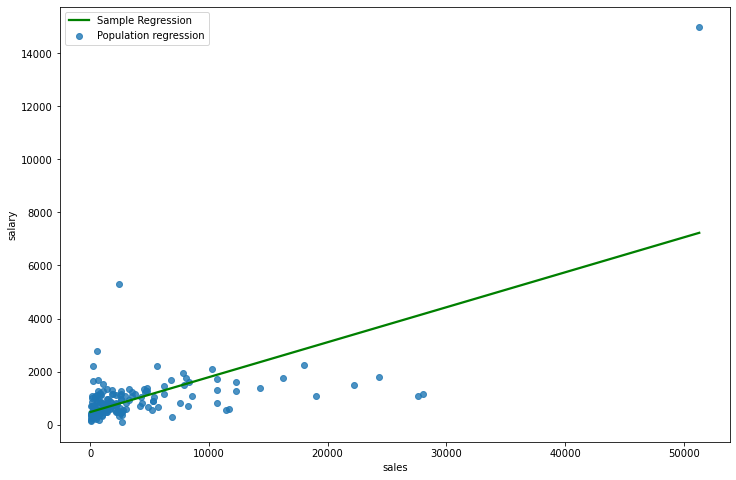

In [23]:
ps2q1["model1yhat"] = model1.predict()
plt.rcParams["figure.figsize"] = [12,8]
sns.regplot(x="sales",y="salary",data=ps2q1, line_kws={"color":"green"}, ci=None);
plt.legend(["Sample Regression", "Population regression","Data"],loc="upper left");

* Calculate the mean of $salary$ and $sales$. Use these values to prove that the predicted regression line estimated in regression (1) goes through the means of $salary$ and $sales$. 

It appears as sales increase the marginal change to CEO salaries is smaller than predicted by
this OLS model. This may be the result of an outlier with \\$15,000,000 salary with \\$50,000 in
sales.

*  The data entry expert contacts you very concerned about the data they gave you. They realized there was a typo. Replace the value of salary to be 2500 if salary is equal to 15000. Estimate regression (1) with this change. Save the predicted values of salary (). Show a graph with the scatter plot of  salary and sales and the predicted regression line of question 1.1 and question 1.4. Discuss these results. 

In [24]:
ps2q1.loc[ps2q1["salary"]==15000]=2500
model2 = smf.ols(formula = "salary ~ sales", data=ps2q1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     25.47
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.12e-06
Time:                        13:52:54   Log-Likelihood:                -1369.1
No. Observations:                 177   AIC:                             2742.
Df Residuals:                     175   BIC:                             2749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    728.0573     50.254     14.488      0.000     628.875     827.239
sales          0.0432      0.009      5.046      0.000       0.026       0.060
==============================================================================
Omnibus:                      173.721   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4423.232
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                      26.411   Cond. No.                     7.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A colleague presented a histogram displaying the distribution of salary and argued that no one could draw any conclusions from a regression using this variable. He correctly points out that regression lines fit through data better when the data is spread across the range of the variable’s possible values. Your colleague wants to use the natural **log of salary**  and the natural **log ofsales** in the model as this function can help to spread out the values of salary and sales. Create the natural logarithm of salary, lnsalary, and the natural logarithm of sales, lnsales. Draw the histograms of salary, lnsalary, sales, and lnsales. Discuss whether you think your colleague’s method of spreading the data worked.
Estimate the following model: 

$lnsalaryi=\gamma_0+\gamma_1lnsalesi+vi$

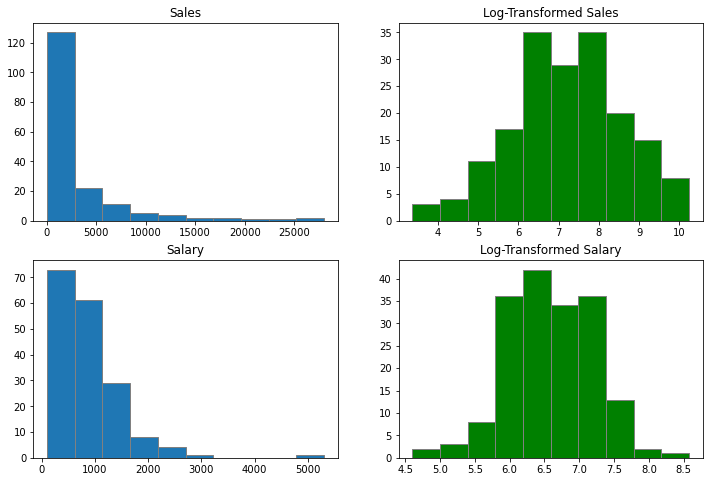

In [63]:
ps2q1["lnsales"]=np.log(ps2q1.sales)
ps2q1["lnsalary"]=np.log(ps2q1.salary)



#define grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2)

#create histograms
axs[0,0].hist(ps2q1["sales"], edgecolor='gray');
axs[0,1].hist(ps2q1["lnsales"], edgecolor='gray', color="green");
#create histograms
axs[1,0].hist(ps2q1["salary"], edgecolor='gray');
axs[1,1].hist(ps2q1["lnsalary"], edgecolor='gray', color="green");

#add title to each histogram
axs[0,0].set_title('Sales');
axs[0,1].set_title('Log-Transformed Sales');

#add title to each histogram
axs[1,0].set_title('Salary');
axs[1,1].set_title('Log-Transformed Salary');